In [2]:
# import necessary libraries
import skimage as ski
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage import exposure
import cv2

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [4]:
# list all the folders in the train directory
Categories = os.listdir('train/')

In [41]:
# # Define a function to extract SIFT features from a grayscale image with a fixed number of keypoints
# def extract_sift_features(img, max_keypoints=100):
#     # Initialize the SIFT detector with the desired maximum number of keypoints
#     sift = cv2.SIFT_create(nfeatures=max_keypoints)
#     # Detect keypoints and compute descriptors
#     keypoints, descriptors = sift.detectAndCompute(img, None)
#     # If there are more keypoints than the maximum allowed, keep only the first 'max_keypoints' keypoints
#     if len(keypoints) > max_keypoints:
#         keypoints = keypoints[:max_keypoints]
#         descriptors = descriptors[:max_keypoints]
#     return descriptors.flatten() if descriptors is not None else np.array([])

# flat_data_arr = []  # Input array
# target_arr = []  # Output array
# datadir = 'train/'
# # Path which contains all the categories of images
# for category in Categories:
#     print(f'Loading category: {category}')
#     path = os.path.join(datadir, category)
#     for img_name in os.listdir(path):
#         img_array = imread(os.path.join(path, img_name))
#         # Convert the image to grayscale
#         img_gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
#         # Optionally preprocess the image before feature extraction
#         # img_resized_threshold = threshold_otsu(img_gray)
#         # gamma_corrected = exposure.adjust_gamma(img_resized_threshold, 2)
#         # edge_array = cv2.Canny(np.array(img_gray), 100, 200)
#         # img_resized = resize(img_gray, (96, 96))

#         # Extract SIFT features with a fixed number of keypoints (e.g., 100)
#         sift_features = extract_sift_features(img_gray, max_keypoints=100)

#         # Append the flattened SIFT features to the input array
#         flat_data_arr.append(sift_features)
#         target_arr.append(Categories.index(category))

#     print(f'Loaded category: {category} successfully')

# # # Convert lists to numpy arrays
# # flat_data = np.array(flat_data_arr)
# # target = np.array(target_arr)



In [42]:
# df = pd.DataFrame(flat_data_arr)

In [43]:
# fill NaN values with 0
# df.fillna(0, inplace=True)

In [44]:
# df['Target'] = target_arr

In [12]:
flat_data_arr=[] #input array 
target_arr=[] #output array 
datadir ='train/'
#path which contains all the categories of images 
for i in Categories: 
    print(f'loading... category : {i}') 
    path=os.path.join(datadir,i) 
    for img in os.listdir(path): 
        img_array=imread(os.path.join(path,img)) 
        # img_array=rgb2gray(img_array)
        # img_resized_threshold = threshold_otsu(img_array)
        # gamma_corrected = exposure.adjust_gamma(img_resized_threshold, 2)
        # edge_array = cv2.Canny(np.array(img_array), 100, 200)
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i)) 
    print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)


loading... category : A
loaded category:A successfully
loading... category : B


KeyboardInterrupt: 

In [10]:
# from sklearn.decomposition import PCA
# num_features = 10  # Number of features to extract
# pca = PCA(n_components=num_features)  # PCA for feature extraction
# # Perform PCA to extract 10 features
# pca.fit(flat_data)
# flat_data_pca = pca.transform(flat_data)

In [11]:
# import numpy as np
# from sklearn.decomposition import PCA


# # Save PCA model and parameters
# import pickle
# pickle.dump(pca, open('pca_model.pkl', 'wb'))


In [47]:
#dataframe 
# df=pd.DataFrame(flat_data_pca) 
df=pd.DataFrame(flat_data)
df['Target']=target_arr
# fill NaN values with 0
# df.fillna(0, inplace=True)
# store the df in compressed format like hdf5
df.to_hdf('feature_data.h5', 'df', mode='w')
# df = pd.read_hdf('feature_data.h5', 'df')


In [59]:
df.shape

(4972, 67501)

In [58]:
# apply feature extraction techniques on the data
# from sklearn.decomposition import PCA
# pca = PCA(n_components=100)
# pca.fit(df.drop('Target', axis=1))
# reduced_data = pca.transform(df.drop('Target', axis=1))
# df = pd.DataFrame(reduced_data)


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.666724,0.666724,0.666724,0.666724,0.666724,0.666724,0.666724,0.666724,0.666724,0.666724,...,0.666724,0.666724,0.666724,0.666724,0.666724,0.666724,0.666724,0.666724,0.666724,0
1,0.662500,0.662500,0.662500,0.662500,0.662500,0.662500,0.662500,0.662500,0.662500,0.662500,...,0.662500,0.662500,0.662500,0.662500,0.662500,0.662500,0.662500,0.662500,0.662500,0
2,0.628967,0.628967,0.628967,0.628967,0.628967,0.628967,0.628967,0.628967,0.628967,0.628967,...,0.628967,0.628967,0.628967,0.628967,0.628967,0.628967,0.628967,0.628967,0.628967,0
3,0.624220,0.624220,0.624220,0.624220,0.624220,0.624220,0.624220,0.624220,0.624220,0.624220,...,0.624220,0.624220,0.624220,0.624220,0.624220,0.624220,0.624220,0.624220,0.624220,0
4,0.594556,0.594556,0.594556,0.594556,0.594556,0.594556,0.594556,0.594556,0.594556,0.594556,...,0.594556,0.594556,0.594556,0.594556,0.594556,0.594556,0.594556,0.594556,0.594556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,0.440133,0.440133,0.440133,0.440133,0.440133,0.440133,0.440133,0.440133,0.440133,0.440133,...,0.440133,0.440133,0.440133,0.440133,0.440133,0.440133,0.440133,0.440133,0.440133,23
4968,0.440514,0.440514,0.440514,0.440514,0.440514,0.440514,0.440514,0.440514,0.440514,0.440514,...,0.440514,0.440514,0.440514,0.440514,0.440514,0.440514,0.440514,0.440514,0.440514,23
4969,0.444361,0.444361,0.444361,0.444361,0.444361,0.444361,0.444361,0.444361,0.444361,0.444361,...,0.444361,0.444361,0.444361,0.444361,0.444361,0.444361,0.444361,0.444361,0.444361,23
4970,0.448826,0.448826,0.448826,0.448826,0.448826,0.448826,0.448826,0.448826,0.448826,0.448826,...,0.448826,0.448826,0.448826,0.448826,0.448826,0.448826,0.448826,0.448826,0.448826,23


In [28]:
# from sklearn.decomposition import PCA
# num_features = 30  # Number of features to extract
# pca = PCA(n_components=num_features)  # PCA for feature extraction
# # Perform PCA to extract 10 features
# pca.fit(df)
# flat_data_pca = pca.transform(df)

In [29]:
# df = pd.DataFrame(flat_data_pca)

In [31]:
# df = pd.read_hdf('feature_data.h5', 'df')

In [49]:
# 1. Divide dataframe into input and output
x = df.drop(columns=['Target']) # Drop the column to be predicted
y = df['Target'] # Choose Output column to be predicted
feature_names = x.columns

In [50]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
											random_state=77, 
											stratify=y)


In [34]:
# # Defining the parameters grid for GridSearchCV 
# param_grid={'C':[0.1,1,10,100], 
# 			'gamma':[0.0001,0.001,0.1,1], 
# 			'kernel':['rbf','poly']} 

# # Creating a support vector classifier 
# svc=svm.SVC(probability=True) 

# # Creating a model using GridSearchCV with the parameters grid 
# model=GridSearchCV(svc,param_grid)


In [35]:
model = svm.SVC(probability=True)

In [36]:
# Training the model using the training data 
model.fit(x_train,y_train)

SVC(probability=True)

In [37]:
# # Save Model Using Pickle
# import pickle
# filename = 'svm_model.pkl'
# pickle.dump(model, open(filename, 'wb'))


# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(x_test, y_test)
# print(result)

In [38]:
# Testing the model using the testing data 
y_pred = model.predict(x_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 45.92964824120603% accurate


In [46]:
# Read and preprocess a new image
new_image_path = 'download.jpg'
target_img_array=imread(new_image_path)
target_img_resized=resize(target_img_array,(96,96,3))
target_img_flatten = target_img_resized.flatten()

# Load saved PCA model
saved_pca = pickle.load(open("pca_model.pkl", 'rb'))

# Subtract mean and project onto eigenvectors
mean_vector = saved_pca.mean_
eigenvectors = saved_pca.components_
centered_image = target_img_flatten - mean_vector
pca_transformed = np.dot(centered_image, eigenvectors.T)

# reshape the pca_transformed array
pca_transformed = pca_transformed.reshape(1, -1)

# # Now pca_transformed contains the PCA-transformed features of the new image
# target_pred = model.predict(pca_transformed) 
# target_pred = Categories[target_pred[0]]
# target_pred


In [9]:
import cv2
import numpy as np
from skimage.transform import resize
from skimage.io import imread
from rembg import remove 
from PIL import Image 
import matplotlib.pyplot as plt

# testimg = Image.open("output.png")

testimg=imread("output.png")
    
testimg = remove(testimg) 
# testimg = remove(testimg) 
# # apply edge detection method on the image
# testimg = cv2.Canny(np.array(testimg), 100, 200)

# # detect the hand in the image
testimg = cv2.dilate(testimg, (3, 3), iterations=1)

# # identify the contours in the image
# contours, _ = cv2.findContours(testimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # # draw the contours on the image
# cv2.drawContours(testimg, contours, -1, (255, 255, 255), 2)

# # # identify the bounding box of the hand
# x, y, w, h = cv2.boundingRect(contours[0])

# # draw the bounding box on the image
cv2.rectangle(testimg, (x, y), (x + w, y + h), (255, 255, 255), 2)

# # crop the hand from the image
testimg = testimg[y:y + h, x:x + w]

# identify keypoints in the image using the ORB algorithm
orb = cv2.ORB_create()
keypoints = orb.detect(testimg, None)

# draw the keypoints on the image
# testimg = cv2.drawKeypoints(testimg, keypoints, None, color=(255, 255, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# match the keypoints with the template image
template = cv2.imread("test.jpg", cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(testimg, None)
keypoints2, descriptors2 = orb.detectAndCompute(template, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)
testimg = cv2.drawMatches(testimg, keypoints1, template, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


# show the image
plt.imshow(testimg)

NameError: name 'x' is not defined

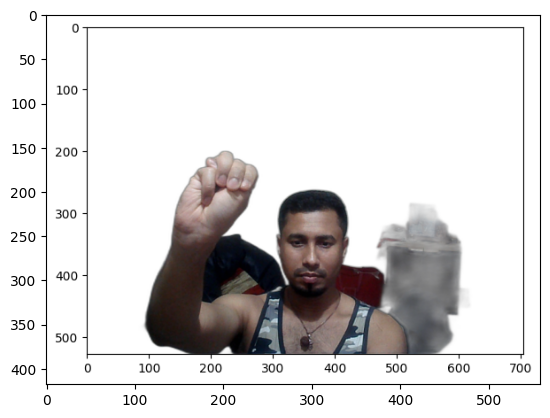

In [11]:
# detect hand in the image and crop the image containing hand
def crop_hand(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (41, 41), 0)
    # Apply thresholding
    _, thresh = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Find the contour with the maximum area
    contour = max(contours, key=cv2.contourArea)
    # Create a mask from the contour
    mask = np.zeros(image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)
    # Apply the mask to get the cropped image
    result = cv2.bitwise_and(image, image, mask=mask)
    return result

# img = Image.open("output.png")
    
# # isolate hand from the image
# img = np.array(img)
# img = crop_hand(img)

# show the image
plt.imshow(img)

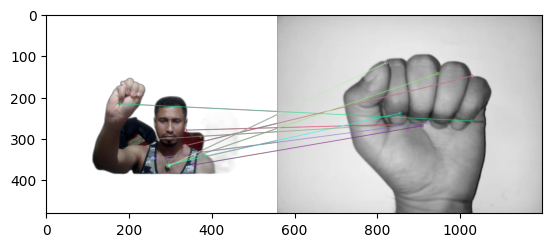

In [12]:

# match the keypoints with the template image
template = cv2.imread("test.jpg", cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(testimg, None)
keypoints2, descriptors2 = orb.detectAndCompute(template, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)
testimg = cv2.drawMatches(testimg, keypoints1, template, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)





# show the image
plt.imshow(testimg)

In [47]:
probability=model.predict_proba(pca_transformed)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(pca_transformed)[0]])

A = 33.176992313125126%
B = 13.977049433896616%
C = 6.268045759053802%
D = 0.7405047593424476%
E = 5.688168586231244%
F = 1.791695054776904%
G = 4.107190707242099%
H = 0.5884244532297651%
I = 1.4006317796490655%
K = 1.43594992674353%
L = 0.7242328019614471%
M = 4.084640235424312%
N = 3.242862285807873%
O = 3.18709477342065%
P = 2.859746089590014%
Q = 1.6292720721710514%
R = 1.403890162026742%
S = 1.9633065429846337%
T = 5.65940216489786%
U = 0.5097857462629943%
V = 0.47936902964662387%
W = 0.4541075002776135%
X = 0.75601577492403%
Y = 3.871622047313584%
The predicted image is : A


In [2]:
import cv2
import numpy as np

# Load the two images
image1 = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('output.png', cv2.IMREAD_GRAYSCALE)


# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize FLANN matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors using KNN
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Find the homography matrix
homography = None
if len(good_matches) > 10:
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
else:
    print("Not enough matches found!")

# Get the dimensions of the first image
h1, w1 = image1.shape[:2]

# Apply the perspective transformation to the second image
if homography is not None:
    transformed_image = cv2.warpPerspective(image2, homography, (w1, h1))
else:
    transformed_image = image2

# Show the matched image and the transformed image
cv2.imshow('Matched Image', matched_image)
cv2.imshow('Transformed Image', transformed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Not enough matches found!


In [18]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize holistic model and drawing utils
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the image
image_path = '/kaggle/input/download/download.jpg'
image = cv2.imread(image_path)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize holistic model with min detection confidence
holistic_model = mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Make prediction on the image
results = holistic_model.process(image_rgb)

# Extract hand landmarks
if results.right_hand_landmarks:
    # Get landmarks for right hand
    hand_landmarks = results.right_hand_landmarks

    # Extract bounding box coordinates for the hand
    bbox_min_x = min(hand_landmarks.landmark, key=lambda x: x.x).x
    bbox_min_y = min(hand_landmarks.landmark, key=lambda x: x.y).y
    bbox_max_x = max(hand_landmarks.landmark, key=lambda x: x.x).x
    bbox_max_y = max(hand_landmarks.landmark, key=lambda x: x.y).y

    # Convert bounding box coordinates to pixel values
    img_height, img_width, _ = image.shape
    bbox_min_x = int(bbox_min_x * img_width)
    bbox_min_y = int(bbox_min_y * img_height)
    bbox_max_x = int(bbox_max_x * img_width)
    bbox_max_y = int(bbox_max_y * img_height)

    # Crop hand region from the image
    hand_cropped = image[bbox_min_y:bbox_max_y, bbox_min_x:bbox_max_x]

    # Display the cropped hand region
    plt.imshow(cv2.cvtColor(hand_cropped, cv2.COLOR_BGR2RGB))
    
else:
    print('No hand detected in the image.')

# Release resources
holistic_model.close()

ModuleNotFoundError: No module named 'mediapipe'

: 

In [13]:
import cv2
import numpy as np
import os

# Function to extract SIFT features and generate a histogram of features
def extract_sift_histogram(image_path, num_bins=128):
    # Load the image in grayscale
    image = cv2.imread(image_path)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect SIFT keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(image, None)

    # Generate histogram of features
    if descriptors is not None:
        # Calculate the histogram
        hist, _ = np.histogram(descriptors, bins=num_bins, range=(0, 256))

        # Normalize the histogram to sum to 1
        hist = hist.astype(float)
        hist /= hist.sum()

        return hist
    else:
        return None

# Directory containing images of different classes
images_dir = 'train/'

# List to store histograms and corresponding labels
histograms = []
labels = []

# Loop through each image in the directory
for class_name in os.listdir(images_dir):
    class_dir = os.path.join(images_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)

            # Extract histogram of features for each image
            hist = extract_sift_histogram(image_path)
            if hist is not None:
                histograms.append(hist)
                labels.append(class_name)

# Convert lists to NumPy arrays
histograms = np.array(histograms)
labels = np.array(labels)

# Print the shapes of histograms and labels arrays
print("Histograms shape:", histograms.shape)
print("Labels shape:", labels.shape)


Histograms shape: (4972, 128)
Labels shape: (4972,)


In [21]:
import cv2
import numpy as np
import os

# Function to extract SIFT features and generate average descriptor
def extract_sift_average(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect SIFT keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(image, None)

    # Calculate the average descriptor
    if descriptors is not None and len(descriptors) > 0:
        average_descriptor = np.mean(descriptors, axis=0)
        return average_descriptor
    else:
        return None

# Directory containing images of different classes
images_dir = 'train/'

# List to store average descriptors and corresponding labels
average_descriptors = []
labels = []

# Loop through each image in the directory
for class_name in os.listdir(images_dir):
    class_dir = os.path.join(images_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)

            # Extract average descriptor for each image
            avg_descriptor = extract_sift_average(image_path)
            if avg_descriptor is not None:
                average_descriptors.append(avg_descriptor)
                labels.append(class_name)

# Convert lists to NumPy arrays
average_descriptors = np.array(average_descriptors)
labels = np.array(labels)

# Print the shapes of average_descriptors and labels arrays
print("Average Descriptors shape:", average_descriptors.shape)
print("Labels shape:", labels.shape)


KeyboardInterrupt: 

<BarContainer object of 128 artists>

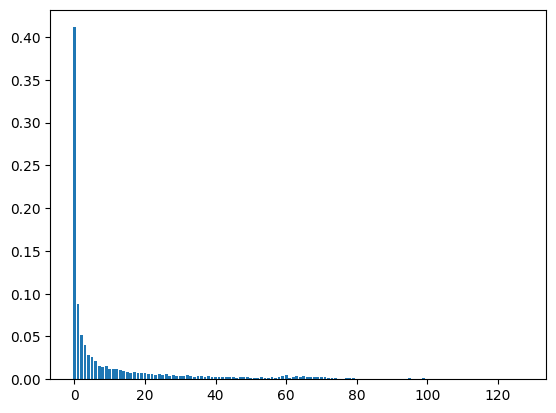

In [20]:
# histogram of features for the first image plotted
plt.bar(range(128), histograms[1500])

In [14]:
# convert the label to numerical values
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert labels to numerical values
labels_encoded = label_encoder.fit_transform(labels)

# Print the classes and their corresponding numerical values
print("Classes:", label_encoder.classes_)

Classes: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S'
 'T' 'U' 'V' 'W' 'X' 'Y']


In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(histograms, labels_encoded, test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) classifier
from sklearn.svm import SVC

# Create an SVM classifier

svm = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.10251256281407035


In [11]:
# import svm.svc from sklearn
from sklearn import svm

# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
			'gamma':[0.0001,0.001,0.1,1], 
			'kernel':['rbf','poly']} 

# Creating a support vector classifier 
svc= svm.SVC(probability=True) 

# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid)

# Training the model using the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.2623115577889447


In [1]:
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans

# Function to extract SIFT features
def extract_sift_features(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect SIFT keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(image, None)

    return descriptors

# Directory containing images of different classes
images_dir = 'train/'

# List to store all SIFT descriptors
all_descriptors = []

# Loop through each image in the directory
for class_name in os.listdir(images_dir):
    class_dir = os.path.join(images_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)

            # Extract SIFT descriptors for each image
            descriptors = extract_sift_features(image_path)
            if descriptors is not None:
                all_descriptors.extend(descriptors)

# Convert the list of descriptors to a NumPy array
all_descriptors = np.array(all_descriptors)

# Apply k-means clustering to create bins/clusters
num_clusters = 100  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(all_descriptors)

# Function to generate histogram of features using k-means clusters
def generate_histogram(image_descriptors):
    # Predict cluster indices for each descriptor
    cluster_indices = kmeans.predict(image_descriptors)

    # Create histogram of features
    hist, _ = np.histogram(cluster_indices, bins=num_clusters, range=(0, num_clusters))

    # Normalize the histogram to sum to 1
    hist = hist.astype(float)
    hist /= hist.sum()

    return hist

# List to store histograms and corresponding labels
histograms = []
labels = []

# Loop through each image in the directory again to generate histograms
for class_name in os.listdir(images_dir):
    class_dir = os.path.join(images_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)

            # Extract SIFT descriptors for each image
            descriptors = extract_sift_features(image_path)
            if descriptors is not None:
                # Generate histogram of features using k-means clusters
                hist = generate_histogram(descriptors)

                # Append histogram and label to lists
                histograms.append(hist)
                labels.append(class_name)

# Convert lists to NumPy arrays
histograms = np.array(histograms)
labels = np.array(labels)

# Print the shapes of histograms and labels arrays
print("Histograms shape:", histograms.shape)
print("Labels shape:", labels.shape)


Histograms shape: (4972, 100)
Labels shape: (4972,)


In [2]:
# save the data in a compressed format
np.savez_compressed('histogram_data.npz', histograms=histograms, labels=labels)

In [2]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split    

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(histograms, labels, test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) classifier
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.33467336683417087


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(histograms, labels, test_size=0.2, random_state=42)

# import svm.svc from sklearn
from sklearn import svm
from sklearn.model_selection import GridSearchCV 

# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
			'gamma':[0.0001,0.001,0.1,1], 
			'kernel':['rbf','poly']} 

# Creating a support vector classifier 
svc= svm.SVC(probability=True) 

# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid)

# Training the model using the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

NameError: name 'accuracy_score' is not defined

In [5]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score


# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9758793969849247


In [6]:
# Save Model Using Pickle
import pickle
filename = 'svm_model.pkl'
pickle.dump(model, open(filename, 'wb'))


# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)


0.9758793969849247
